In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("card_transdata.csv", sep=",") #importação dos dados
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
#tudo float e não às NaN, Greattt!!!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

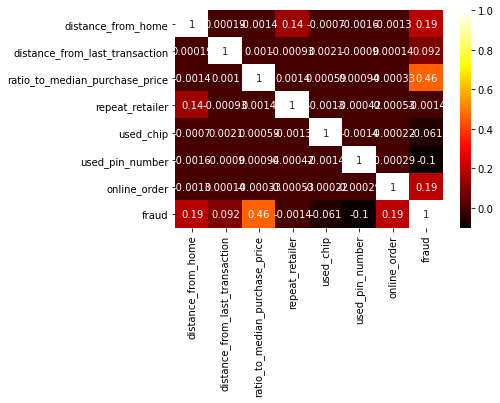

In [5]:
#vamos analisar a correlação entre as features
corr = data.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

In [6]:
#Vamos agora analisar a nossa label. Podemos verificar que a nossa label está bastante desbalanceada
data.value_counts("fraud")

fraud
0.0    912597
1.0     87403
dtype: int64

In [7]:
#Temos duas opções: ou reduzimos o nosso data set até obtermos uma label balanceada ou criamos dados virtuais aumentando assim o nosso dataset
#Como a amostra de dados com fraud =1 são cerca de 87 mil linhas, vamos simplificar e reduzir para o mesmo número de linhas os dados associados à
#fraud = 0 e ficamos com um dataset com a label balanceada e cerca de 170 mil observações

real = data[data["fraud"] == 0]
fraude = data[data["fraud"] == 1]


In [8]:
real_amostra = real.sample(n = 87403, random_state = 123)
fraude_amostra = fraude.sample(n = 87403, random_state = 123)

In [9]:
# Unir os dois datasets 
df = pd.concat([real_amostra, fraude_amostra], axis = 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174806 entries, 263626 to 180922
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              174806 non-null  float64
 1   distance_from_last_transaction  174806 non-null  float64
 2   ratio_to_median_purchase_price  174806 non-null  float64
 3   repeat_retailer                 174806 non-null  float64
 4   used_chip                       174806 non-null  float64
 5   used_pin_number                 174806 non-null  float64
 6   online_order                    174806 non-null  float64
 7   fraud                           174806 non-null  float64
dtypes: float64(8)
memory usage: 12.0 MB


In [11]:
df.value_counts("fraud")

fraud
0.0    87403
1.0    87403
dtype: int64

In [12]:
features = df [["distance_from_home","distance_from_last_transaction",
                "ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]]
label = df ["fraud"]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
263626,5.146370,0.581827,2.020163
455906,7.014228,4.098572,0.090274
167090,2.488980,1.918921,0.703847
943936,12.325551,0.398978,0.328721
571244,39.943200,0.086986,1.839616
...,...,...,...
721979,1.864033,0.627689,10.237545
701938,6.285767,0.189382,5.966635
204420,1.734421,0.911373,10.009849
324148,12.714599,1.569586,5.988711


In [15]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
# Criando Train Test Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size = 0.25, random_state = 123, shuffle = True)

In [17]:
# Escalar os dados para melhores resultados
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)